<br>
<br>


**Problem Breaks down into five simple steps to solve a problem in monte carlo method:**
- Setting up a probability distribution for important variables.
- Building a cumulative probability distributino for each variable.
- Establishing an interval of random numbers for each variable.
- Generating random numbers.
- Actually simulating a serics of trials.


<br>
<br>

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


<br>
<br>

# `#2.2: Coin Toss Gambling Game:`

<br>
<br>

In [2]:

# coin toss:
def coin_toss()->int:
    return np.random.randint(0,2)

def gambling_game(no_of_game:int)->tuple[pd.DataFrame,tuple[int,int]]:
    records = []
    win_count = 0
    lose_count = 0
    for i in range(1,no_of_game+1):
        flips = 0
        head_count = 0
        tail_count = 0
        while(abs(head_count-tail_count))<3:
            flips+=1
            if coin_toss()==0:
                head_count+=1
            else:
                tail_count+=1
        if flips<8:
            win_count+=1
        else: 
            lose_count+=1
        records.append({"Game_no":i,"Head_Count":head_count,"Tail_Count":tail_count,"Result":flips<8})
            
    return pd.DataFrame(records),(win_count,lose_count)

data_frame,count = gambling_game(50)
print("Win,Loss ",count)
data_frame

Win,Loss  (27, 23)


,Game_no,Head_Count,Tail_Count,Result
0,1,6,3,False
1,2,4,1,True
2,3,5,8,False
3,4,0,3,True
4,5,16,19,False
5,6,3,0,True
6,7,4,7,False
7,8,5,8,False
8,9,1,4,True
9,10,6,3,False


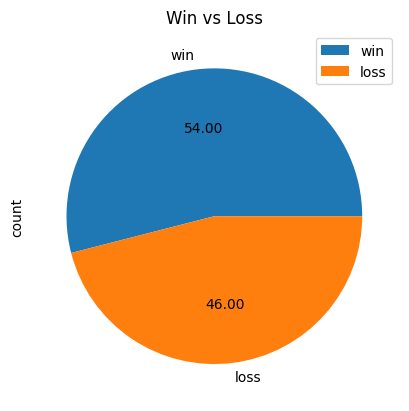

In [3]:


plt.title(f"Win vs Loss")
data_frame["Result"].astype(int).value_counts().rename({0:"loss",1:"win"}).plot(kind="pie",autopct="%.2f")
plt.legend()
plt.show()



<br>
<br>

# `#2.4: Value of pi:`

<br>

```txt
Area of circle = pi*r^2
Area of sqaure = 2r*2r = 4 r*2 

pi*r^2/4r^2 = pi/4 = inside_circle/total 

pi = 4 *(inside_cricle/4)
```

<br>

In [4]:
np.random.random(size=5)

array([0.06126311, 0.95267298, 0.66250652, 0.34016997, 0.41027938])

In [5]:

def value_of_pi(n:int):
    x = np.random.random(size=n)
    y = np.random.random(size=n)
    inside_cnt = 0
    val = []
    for i in range(n):
        if (x[i]**2+y[i]**2)<1:
            inside_cnt +=1 
        value = 4*(inside_cnt/(i+1))
        val.append(value)
    return value,val

value, val = value_of_pi(100000)
value

3.1432

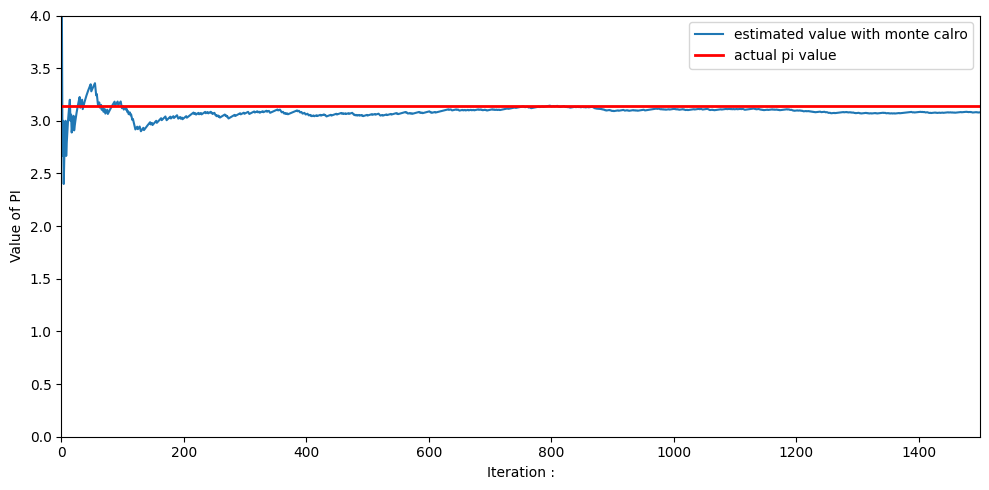

In [6]:

plt.figure(figsize=(10,5))
plt.plot(val,label="estimated value with monte calro")
plt.axhline(y=np.pi,color="red",label="actual pi value",linewidth=2)
plt.xlabel("Iteration :")
plt.ylabel("Value of PI")
plt.ylim(0,4)
plt.xlim(0,1500)
plt.legend()
plt.tight_layout()
plt.show()


<br>
<br>

# `#2.3: Numerical Intregation:`

```txt
- যেকোনো, x_i তে curve-এর height = xi_3
- তার নিচে থাকা সব y value হলো valid area
```
<br>
<br>

In [7]:


# true value: 152.25
def make_eq(x):
    return x**3 


def numerical_intregation(n:int,upper_limit:int,lower_limit:int)->tuple[list,int]:
    val = []
    rec_height = make_eq(upper_limit)
    x  = np.linspace(lower_limit,upper_limit,n)
    y = np.random.random(n)*rec_height
    x_3 = x**3 
    shed_val = 0
    for i in range(n):
        if y[i]<x_3[i]:
            shed_val+=1
        area = (shed_val/(i+1)) * rec_height * (upper_limit-lower_limit)
        val.append(area)
    return area,val

area , val = numerical_intregation(10000,5,2)
print(area)


154.6875


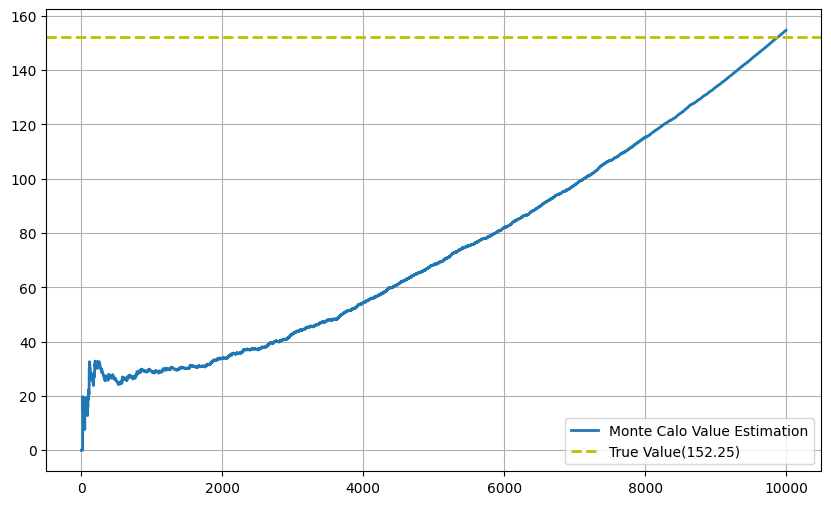

In [8]:

plt.figure(figsize=(10,6))
plt.plot(val,label="Monte Calo Value Estimation",linewidth=2)
plt.axhline(y=152.25,linestyle="--",color="y",label="True Value(152.25)",linewidth=2)
plt.grid()
plt.legend()
plt.show()


<br>
<br>


# `#2.5: A random walk`

<br>
<br>

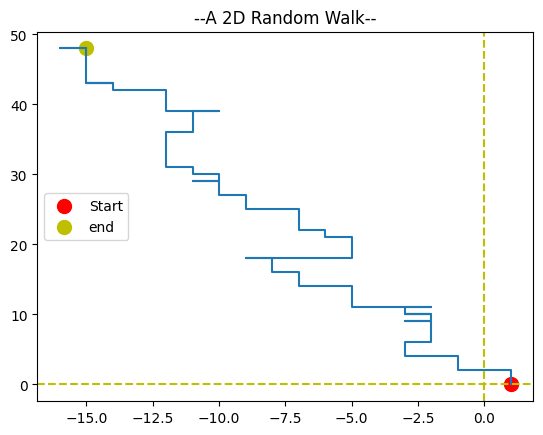

In [9]:


def a_random_walk(total_step:int):
    expt = []
    x = y = 0 
    for _ in range(total_step):
        r_num = np.random.randint(0,11)
        if r_num in [0,1,2,3,4]:
            y +=1 
        elif r_num in [5,6,7]:
            x -=1 
        elif r_num in [8,9]:
            x +=1 
        expt.append([x,y])
    return np.matrix(expt)
ans = a_random_walk(100)


plt.title("--A 2D Random Walk--")
plt.axhline(y=0,linestyle="--",color="y")
plt.axvline(x=0,linestyle="--",color="y")
plt.plot(ans[:,0],ans[:,1])
plt.scatter(ans[0:1,0:1].item(),y=ans[0:1,1:2].item(),s=100,label="Start",c="red")
plt.scatter(ans[-1,0:1].item(),y=ans[-1,1:2].item(),s=100,label="end",c="y")
plt.legend()
plt.show()


<br>
<br>

# `#2.7 Bombing Problem:`

<br>
<br>

In [71]:
np.random.normal(loc=0,scale=1,size=10)

array([ 0.652072  ,  0.68116166, -0.74338186,  0.49340273,  1.94874735,
        0.09316896, -0.09168722,  0.50047423,  0.67888806, -0.34610623])

******************** Top 10 Result ********************
         rnn_w       rnn_h result
0  -146.987013 -196.774097    win
1  1383.738969  168.455627    win
2   166.174220 -232.699093    win
3   501.983079 -341.397192   loss
4   118.885157 -213.632719    win
5  -490.653059 -455.592402   loss
6  -209.090344  -27.078073    win
7   611.126912 -211.781829    win
8   440.496165  248.256906    win
9   191.972980 -146.899279    win
******************** Win vs Lose Count ********************


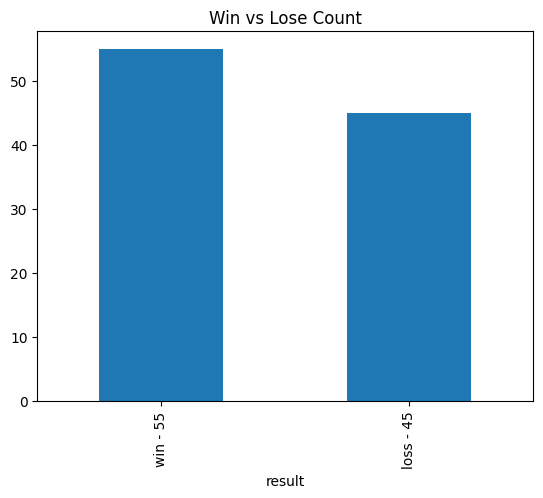

In [83]:

def bombing_prb(n:int,x:int,y:int):
    mu = 0
    std = 1 
    rnn_w = np.random.normal(loc=mu,scale=std,size=n)*x
    rnn_h = np.random.normal(loc=mu,scale=std,size=n)*y 
    result = []
    for i in range(n):
        if (rnn_w[i]>= -x and rnn_h[i]<=x) & (rnn_h[i]>=-y and rnn_h[i]<=y):
            result.append({
                "rnn_w":rnn_w[i],
                "rnn_h":rnn_h[i],
                "result": "win"
            })
        else:
             result.append({
                "rnn_w":rnn_w[i],
                "rnn_h":rnn_h[i],
                "result": "loss"
            })
    return pd.DataFrame(result)

res = bombing_prb(100,x=500,y=300)

print("*"*20,"Top 10 Result","*"*20)
print(res.head(10))
print("*"*20,"Win vs Lose Count","*"*20)
win,loss = res["result"].value_counts()
res["result"].value_counts().plot(kind="bar",title="Win vs Lose Count")
plt.xticks([0,1],labels=[f"win - {win}","loss - {}".format(loss)])
plt.show()